<a href="https://colab.research.google.com/github/yimeiwen/HPLC_ColumnPerformance/blob/main/UPLC_column_performance_score.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UPLC Column Performance

UPLC column for oligonucleotide (DNA/RNA) separation

In [ ]:
#set up google drive environment
import pandas as pd
import numpy as np
from tabulate import tabulate

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

id1 = '1zOeKfgOntVSP6xxqSd30RwoUPIiBxDND'
file1 = drive.CreateFile({'id':id1})
file1.GetContentFile('waters_pass_fail_column.csv')
UPLC_df1=pd.read_csv('waters_pass_fail_column.csv')

UPLC_df1.head(50)

#https://drive.google.com/file/d/1zOeKfgOntVSP6xxqSd30RwoUPIiBxDND/view?usp=sharing

,ColumnType,Column_ID,FailOrPass,Name,Area,% Area,Height,Width,USP Resolution,Asym @ 10,Asym,USP Tailing,USP Plate Count,Width @ Baseline,Width @ Tangent (USP Resolution),Width @ 5%,Width @ 50%
0,XBridge C18,AD0224,1,15T,170332,22.56,19150,54.50,NaN,1.522599,18320.25520,1.443746,27152.66664,0.908333,0.220900,0.338879,0.128185
1,XBridge C18,AD0224,1,20T,157246,20.82,17009,44.10,14.953232,1.592854,30415.10744,1.452604,46462.40756,0.735000,0.231600,0.347182,0.133800
2,XBridge C18,AD0224,1,25T,170688,22.60,18165,40.70,10.932731,1.606874,42240.97520,1.437312,64142.44494,0.678333,0.237600,0.348007,0.137173
3,XBridge C18,AD0224,1,30T,136563,18.08,14052,49.90,8.375642,1.655828,48802.84588,1.525441,80454.46227,0.831667,0.240400,0.378030,0.139244
4,XBridge C18,AD0224,1,35T,120332,15.93,12355,47.40,6.664937,1.696052,55405.91371,1.563523,94090.59218,0.790000,0.243300,0.387974,0.141610
5,XBridge C18,AD0224,1,15T,213498,23.61,23177,52.95,NaN,1.598886,16482.48689,1.483830,25369.52501,0.882500,0.228073,0.349844,0.132381
6,XBridge C18,AD0224,1,20T,185454,20.51,19873,44.10,14.738768,1.654341,29223.40904,1.488983,46036.13509,0.735000,0.232599,0.350468,0.134077
7,XBridge C18,AD0224,1,25T,205925,22.77,21212,60.60,10.957221,1.736870,38172.36786,1.566426,64530.83824,1.010000,0.236968,0.371965,0.136792
8,XBridge C18,AD0224,1,30T,158537,17.53,16375,52.90,8.422851,1.702255,48849.24814,1.543407,81490.75187,0.881667,0.238957,0.373279,0.138012
9,XBridge C18,AD0224,1,35T,140862,15.58,14470,56.95,6.712765,1.748295,53856.98234,1.610192,95333.31580,0.949167,0.241834,0.394211,0.140837


In [ ]:
UPLC_df1['USP Resolution'] = UPLC_df1['USP Resolution'].replace(np.nan, 25)
UPLC_df2=UPLC_df1[UPLC_df1.FailOrPass !=0]
UPLC_df2.head(50)

,ColumnType,Column_ID,FailOrPass,Name,Area,% Area,Height,Width,USP Resolution,Asym @ 10,Asym,USP Tailing,USP Plate Count,Width @ Baseline,Width @ Tangent (USP Resolution),Width @ 5%,Width @ 50%
0,XBridge C18,AD0224,1,15T,170332,22.56,19150,54.50,25.000000,1.522599,18320.25520,1.443746,27152.66664,0.908333,0.220900,0.338879,0.128185
1,XBridge C18,AD0224,1,20T,157246,20.82,17009,44.10,14.953232,1.592854,30415.10744,1.452604,46462.40756,0.735000,0.231600,0.347182,0.133800
2,XBridge C18,AD0224,1,25T,170688,22.60,18165,40.70,10.932731,1.606874,42240.97520,1.437312,64142.44494,0.678333,0.237600,0.348007,0.137173
3,XBridge C18,AD0224,1,30T,136563,18.08,14052,49.90,8.375642,1.655828,48802.84588,1.525441,80454.46227,0.831667,0.240400,0.378030,0.139244
4,XBridge C18,AD0224,1,35T,120332,15.93,12355,47.40,6.664937,1.696052,55405.91371,1.563523,94090.59218,0.790000,0.243300,0.387974,0.141610
5,XBridge C18,AD0224,1,15T,213498,23.61,23177,52.95,25.000000,1.598886,16482.48689,1.483830,25369.52501,0.882500,0.228073,0.349844,0.132381
6,XBridge C18,AD0224,1,20T,185454,20.51,19873,44.10,14.738768,1.654341,29223.40904,1.488983,46036.13509,0.735000,0.232599,0.350468,0.134077
7,XBridge C18,AD0224,1,25T,205925,22.77,21212,60.60,10.957221,1.736870,38172.36786,1.566426,64530.83824,1.010000,0.236968,0.371965,0.136792
8,XBridge C18,AD0224,1,30T,158537,17.53,16375,52.90,8.422851,1.702255,48849.24814,1.543407,81490.75187,0.881667,0.238957,0.373279,0.138012
9,XBridge C18,AD0224,1,35T,140862,15.58,14470,56.95,6.712765,1.748295,53856.98234,1.610192,95333.31580,0.949167,0.241834,0.394211,0.140837


# Data Exploration
Full Description of each fields

In [ ]:
UPLC_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 535 entries, 0 to 534
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ColumnType                        535 non-null    object 
 1   Column_ID                         535 non-null    object 
 2   FailOrPass                        535 non-null    int64  
 3   Name                              535 non-null    object 
 4   Area                              535 non-null    int64  
 5   % Area                            535 non-null    float64
 6   Height                            535 non-null    int64  
 7   Width                             535 non-null    float64
 8   USP Resolution                    428 non-null    float64
 9   Asym @ 10                         535 non-null    float64
 10  Asym                              535 non-null    float64
 11  USP Tailing                       530 non-null    float64
 12  USP Plat

In [ ]:
UPLC_df1.nunique()

ColumnType                            8
Column_ID                            53
FailOrPass                            2
Name                                  5
Area                                534
% Area                              437
Height                              526
Width                               425
USP Resolution                      428
Asym @ 10                           535
Asym                                535
USP Tailing                         530
USP Plate Count                     535
Width @ Baseline                    425
Width @ Tangent (USP Resolution)    535
Width @ 5%                          529
Width @ 50%                         535
dtype: int64

In [ ]:
UPLC_df1.isnull().sum()

ColumnType                            0
Column_ID                             0
FailOrPass                            0
Name                                  0
Area                                  0
% Area                                0
Height                                0
Width                                 0
USP Resolution                      107
Asym @ 10                             0
Asym                                  0
USP Tailing                           5
USP Plate Count                       0
Width @ Baseline                      0
Width @ Tangent (USP Resolution)      0
Width @ 5%                            5
Width @ 50%                           0
dtype: int64

# seaborn.diverging_palette
seaborn.diverging_palette(h_neg, h_pos, s=75, l=50, sep=1, n=6, center='light', as_cmap=False)¶


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


[Text(0.5, 0, '% Area'),
 Text(1.5, 0, 'Width'),
 Text(2.5, 0, 'USP Resolution'),
 Text(3.5, 0, 'Asym @ 10'),
 Text(4.5, 0, 'Asym'),
 Text(5.5, 0, 'USP Tailing'),
 Text(6.5, 0, 'USP Plate Count'),
 Text(7.5, 0, 'Width @ Baseline'),
 Text(8.5, 0, 'Width @ Tangent (USP Resolution)'),
 Text(9.5, 0, 'Width @ 5%'),
 Text(10.5, 0, 'Width @ 50%')]

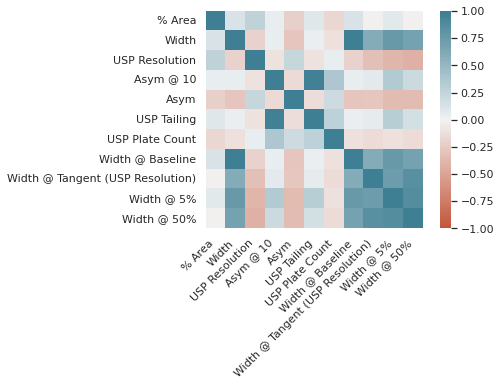

In [ ]:
# correlation heat map of numerical features
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

numCol_1 = []
for col in UPLC_df1:
  if UPLC_df1[col].dtype == np.float:
    numCol_1.append(col)
corr = UPLC_df1[numCol_1].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

In [ ]:
#check the actual values of correlations
corr_score1=UPLC_df1[numCol_1].corr()
corr_score1

,% Area,Width,USP Resolution,Asym @ 10,Asym,USP Tailing,USP Plate Count,Width @ Baseline,Width @ Tangent (USP Resolution),Width @ 5%,Width @ 50%
% Area,1.000000,0.130647,0.490250,0.042145,-0.211101,0.097943,-0.167462,0.130647,-0.010307,0.081505,-0.013820
Width,0.130647,1.000000,-0.062969,0.043415,-0.283160,0.039062,-0.113980,1.000000,0.594340,0.760554,0.681489
USP Resolution,0.490250,-0.062969,1.000000,-0.078458,-0.058875,-0.062039,-0.032857,-0.062969,-0.251436,-0.232864,-0.289526
Asym @ 10,0.042145,0.043415,-0.078458,1.000000,-0.148985,0.973569,0.369849,0.043415,0.076514,0.341443,0.201597
Asym,-0.211101,-0.283160,-0.058875,-0.148985,1.000000,-0.120757,0.192636,-0.283160,-0.258631,-0.344654,-0.331907
USP Tailing,0.097943,0.039062,-0.062039,0.973569,-0.120757,1.000000,0.287144,0.039062,0.052116,0.313052,0.160849
USP Plate Count,-0.167462,-0.113980,-0.032857,0.369849,0.192636,0.287144,1.000000,-0.113980,-0.143256,-0.112373,-0.145188
Width @ Baseline,0.130647,1.000000,-0.062969,0.043415,-0.283160,0.039062,-0.113980,1.000000,0.594340,0.760554,0.681489
Width @ Tangent (USP Resolution),-0.010307,0.594340,-0.251436,0.076514,-0.258631,0.052116,-0.143256,0.594340,1.000000,0.732181,0.858419
Width @ 5%,0.081505,0.760554,-0.232864,0.341443,-0.344654,0.313052,-0.112373,0.760554,0.732181,1.000000,0.871723


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


[Text(0.5, 0, '% Area'),
 Text(1.5, 0, 'Width'),
 Text(2.5, 0, 'USP Resolution'),
 Text(3.5, 0, 'Asym @ 10'),
 Text(4.5, 0, 'Asym'),
 Text(5.5, 0, 'USP Tailing'),
 Text(6.5, 0, 'USP Plate Count'),
 Text(7.5, 0, 'Width @ Baseline'),
 Text(8.5, 0, 'Width @ Tangent (USP Resolution)'),
 Text(9.5, 0, 'Width @ 5%'),
 Text(10.5, 0, 'Width @ 50%')]

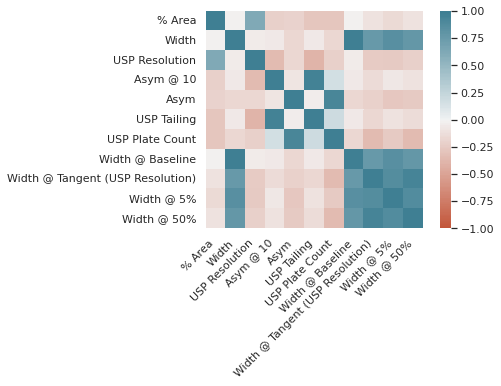

In [ ]:
# correlation heat map of numerical features
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

numCol_2 = []
for col in UPLC_df2:
  if UPLC_df2[col].dtype == np.float:
    numCol_2.append(col)
corr = UPLC_df2[numCol_2].corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

In [ ]:
corr_score2=UPLC_df2[numCol_2].corr()
corr_score2

,% Area,Width,USP Resolution,Asym @ 10,Asym,USP Tailing,USP Plate Count,Width @ Baseline,Width @ Tangent (USP Resolution),Width @ 5%,Width @ 50%
% Area,1.000000,-0.008387,0.621540,-0.214069,-0.202313,-0.277583,-0.277728,-0.008387,-0.091595,-0.150985,-0.098535
Width,-0.008387,1.000000,-0.044469,-0.057258,-0.159729,-0.051706,-0.171738,1.000000,0.761756,0.844953,0.775551
USP Resolution,0.621540,-0.044469,1.000000,-0.347447,-0.161321,-0.394559,-0.212460,-0.044469,-0.246671,-0.254783,-0.211689
Asym @ 10,-0.214069,-0.057258,-0.347447,1.000000,-0.081289,0.966570,0.156267,-0.057258,-0.141323,-0.066329,-0.095673
Asym,-0.202313,-0.159729,-0.161321,-0.081289,1.000000,-0.035666,0.930461,-0.159729,-0.207461,-0.260172,-0.254651
USP Tailing,-0.277583,-0.051706,-0.394559,0.966570,-0.035666,1.000000,0.188818,-0.051706,-0.159305,-0.091105,-0.134341
USP Plate Count,-0.277728,-0.171738,-0.212460,0.156267,0.930461,0.188818,1.000000,-0.171737,-0.341403,-0.255533,-0.343138
Width @ Baseline,-0.008387,1.000000,-0.044469,-0.057258,-0.159729,-0.051706,-0.171737,1.000000,0.761757,0.844953,0.775551
Width @ Tangent (USP Resolution),-0.091595,0.761756,-0.246671,-0.141323,-0.207461,-0.159305,-0.341403,0.761757,1.000000,0.867685,0.946244
Width @ 5%,-0.150985,0.844953,-0.254783,-0.066329,-0.260172,-0.091105,-0.255533,0.844953,0.867685,1.000000,0.877432


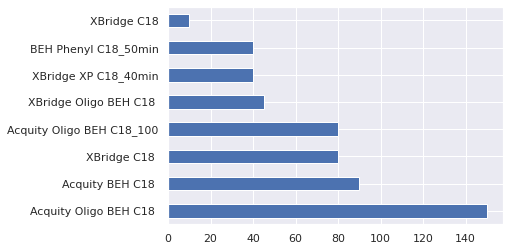

In [ ]:
UPLC_df1['ColumnType'].value_counts().plot(kind='barh')

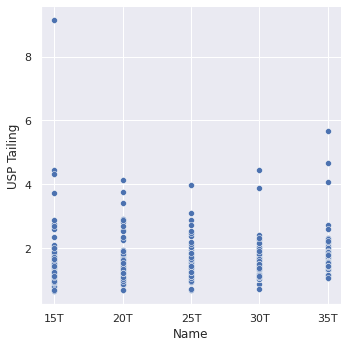

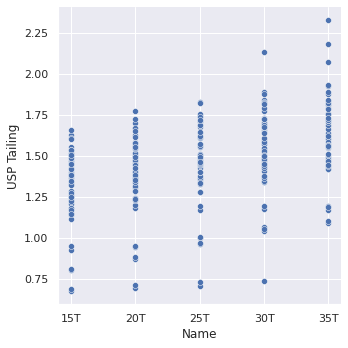

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(x="Name", y="USP Tailing", data=UPLC_df1);
sns.relplot(x="Name",y="USP Tailing", data=UPLC_df2);

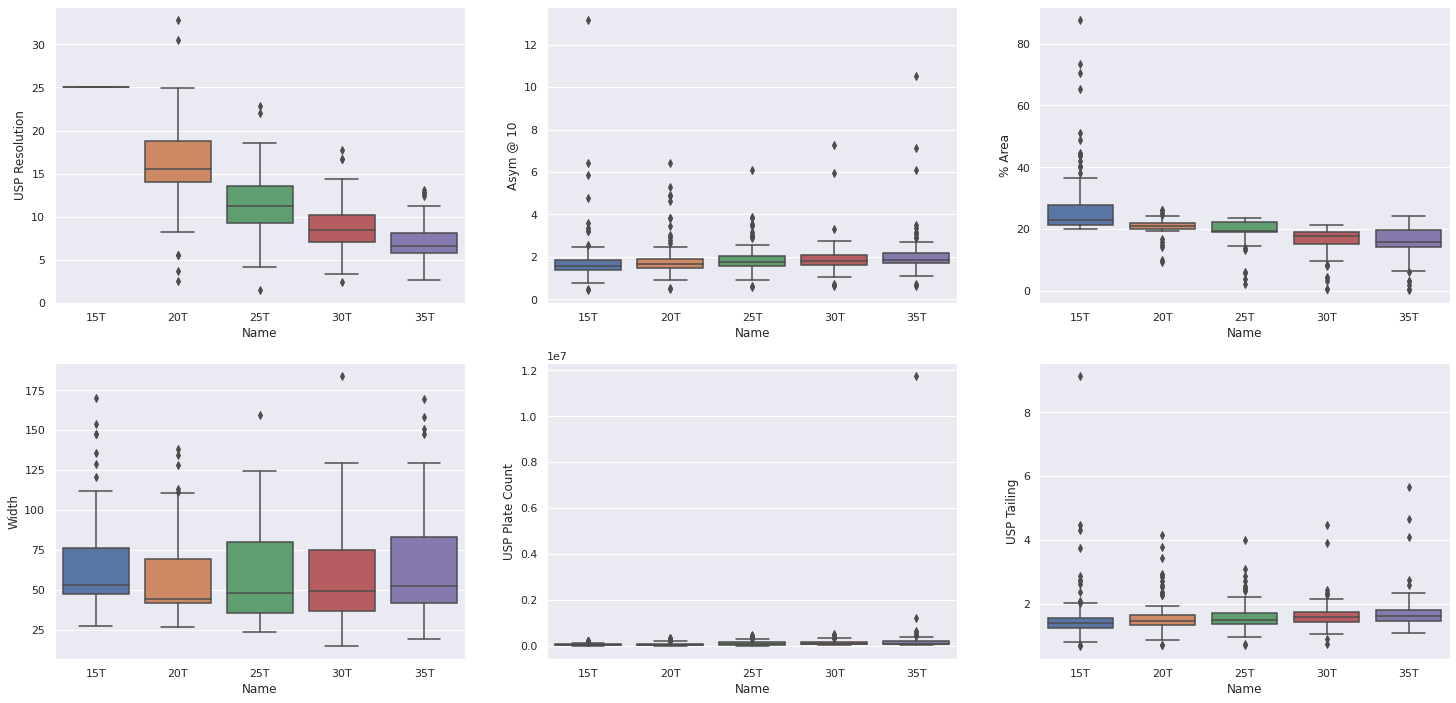

In [ ]:
_,axss = plt.subplots(2,3,figsize=[25,12]) 
# boxplot for numerical feature
sns.boxplot(x='Name', y='USP Resolution',data= UPLC_df1,ax=axss[0][0])
sns.boxplot(x='Name', y='Asym @ 10',data=UPLC_df1,ax=axss[0][1])
sns.boxplot(x='Name', y ='% Area', data=UPLC_df1,ax=axss[0][2])
sns.boxplot(x='Name', y ='Width', data=UPLC_df1,ax=axss[1][0])
sns.boxplot(x='Name', y ='USP Plate Count', data=UPLC_df1,ax=axss[1][1])
sns.boxplot(x='Name', y ='USP Tailing', data=UPLC_df1,ax=axss[1][2])

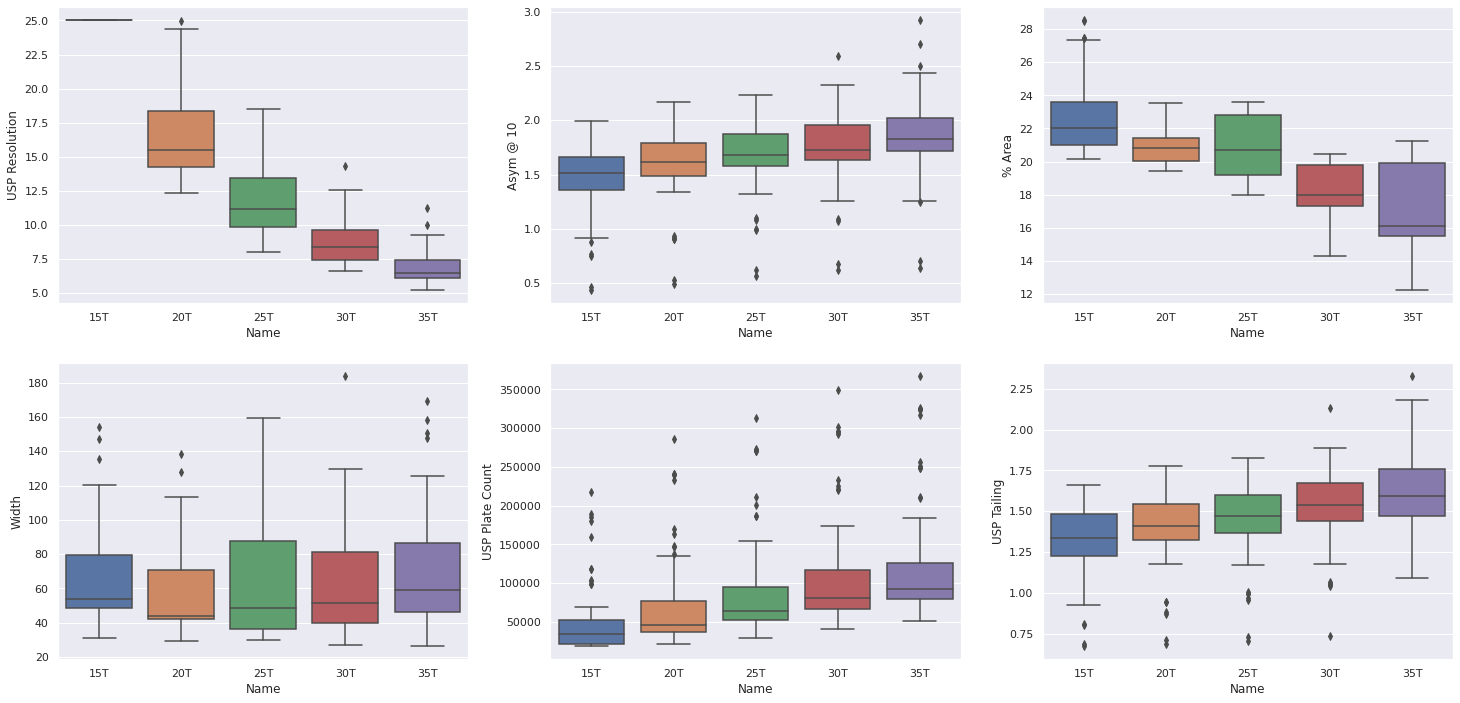

In [ ]:
_,axss = plt.subplots(2,3,figsize=[25,12]) 
# boxplot for numerical feature
sns.boxplot(x='Name', y='USP Resolution',data= UPLC_df2,ax=axss[0][0])
sns.boxplot(x='Name', y='Asym @ 10',data=UPLC_df2,ax=axss[0][1])
sns.boxplot(x='Name', y ='% Area', data=UPLC_df2,ax=axss[0][2])
sns.boxplot(x='Name', y ='Width', data=UPLC_df2,ax=axss[1][0])
sns.boxplot(x='Name', y ='USP Plate Count', data=UPLC_df2,ax=axss[1][1])
sns.boxplot(x='Name', y ='USP Tailing', data=UPLC_df2,ax=axss[1][2])

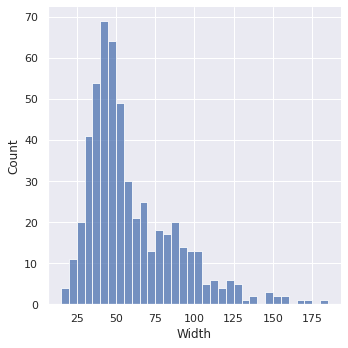

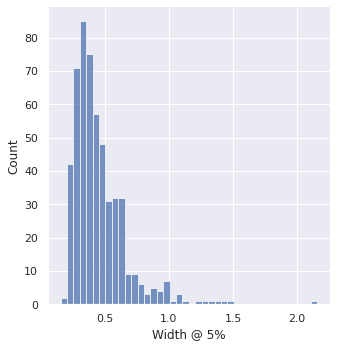

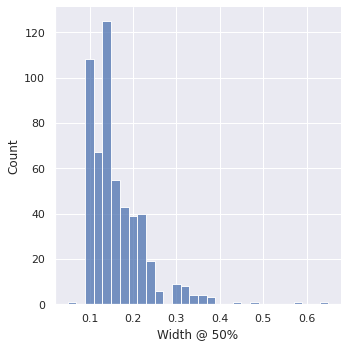

In [ ]:
sns.displot(UPLC_df1, x="Width", binwidth=5)
sns.displot(UPLC_df1, x="Width @ 5%", binwidth=0.05)
sns.displot(UPLC_df1, x="Width @ 50%", binwidth=0.02)

# Data Cleaning and Feature Preprocessing

In [ ]:
UPLC_df1.describe()

,FailOrPass,Area,% Area,Height,Width,USP Resolution,Asym @ 10,Asym,USP Tailing,USP Plate Count,Width @ Baseline,Width @ Tangent (USP Resolution),Width @ 5%,Width @ 50%
count,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,535.000000,530.000000,5.350000e+02,535.000000,535.000000,530.000000,535.000000
mean,0.616822,150871.971963,20.000206,13810.768224,59.815047,13.716496,1.924295,59713.911609,1.620826,1.308929e+05,0.996917,0.292777,0.455048,0.162967
std,0.486616,85324.028302,7.511205,7730.788300,28.301739,7.050841,1.018793,54851.560705,0.637699,5.146807e+05,0.471696,0.151207,0.209080,0.066171
min,0.000000,89.000000,0.320000,15.000000,15.100000,1.476631,0.437472,138.226989,0.676944,5.422442e+02,0.251667,0.029390,0.156088,0.049672
25%,0.000000,91485.500000,17.475000,7556.500000,40.725000,8.044756,1.540087,27178.683585,1.344726,4.165251e+04,0.678750,0.196022,0.325921,0.114558
50%,1.000000,158337.000000,20.030000,14380.000000,50.500000,11.620627,1.732018,42465.368460,1.504906,7.286658e+04,0.841667,0.251813,0.399011,0.144854
75%,1.000000,215325.000000,21.735000,19047.500000,75.000000,19.013185,2.028943,69575.335740,1.708740,1.350135e+05,1.250000,0.346921,0.541356,0.191282
max,1.000000,415788.000000,87.480000,36086.000000,183.800000,32.779287,13.144674,495538.782800,9.133441,1.174623e+07,3.063333,2.411617,2.113933,0.634007


# Data Cleaning
15mer has no value for all USP resolution---->replace w 25, arbitrary number
drop all lines with NaN in other rows


In [ ]:
UPLC_df3 = UPLC_df1.dropna()
UPLC_df4=UPLC_df2.dropna()



In [ ]:
UPLC_df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 530 entries, 0 to 534
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ColumnType                        530 non-null    object 
 1   Column_ID                         530 non-null    object 
 2   FailOrPass                        530 non-null    int64  
 3   Name                              530 non-null    object 
 4   Area                              530 non-null    int64  
 5   % Area                            530 non-null    float64
 6   Height                            530 non-null    int64  
 7   Width                             530 non-null    float64
 8   USP Resolution                    530 non-null    float64
 9   Asym @ 10                         530 non-null    float64
 10  Asym                              530 non-null    float64
 11  USP Tailing                       530 non-null    float64
 12  USP Plat

In [ ]:
UPLC_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 0 to 534
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ColumnType                        325 non-null    object 
 1   Column_ID                         325 non-null    object 
 2   FailOrPass                        325 non-null    int64  
 3   Name                              325 non-null    object 
 4   Area                              325 non-null    int64  
 5   % Area                            325 non-null    float64
 6   Height                            325 non-null    int64  
 7   Width                             325 non-null    float64
 8   USP Resolution                    325 non-null    float64
 9   Asym @ 10                         325 non-null    float64
 10  Asym                              325 non-null    float64
 11  USP Tailing                       325 non-null    float64
 12  USP Plat

In [ ]:
# Data Cleaning / Integration
class_mapping = {label:idx for idx, label in enumerate(np.unique(UPLC_df4['% Area']))}  #Find the unique elements of an array.
UPLC_df4['% Area']=UPLC_df4['% Area'].map(class_mapping)

UPLC_df4.head(30)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,ColumnType,Column_ID,FailOrPass,Name,Area,% Area,Height,Width,USP Resolution,Asym @ 10,Asym,USP Tailing,USP Plate Count,Width @ Baseline,Width @ Tangent (USP Resolution),Width @ 5%,Width @ 50%
0,XBridge C18,AD0224,1,15T,170332,209,19150,54.50,25.000000,1.522599,18320.25520,1.443746,27152.66664,0.908333,0.220900,0.338879,0.128185
1,XBridge C18,AD0224,1,20T,157246,157,17009,44.10,14.953232,1.592854,30415.10744,1.452604,46462.40756,0.735000,0.231600,0.347182,0.133800
2,XBridge C18,AD0224,1,25T,170688,212,18165,40.70,10.932731,1.606874,42240.97520,1.437312,64142.44494,0.678333,0.237600,0.348007,0.137173
3,XBridge C18,AD0224,1,30T,136563,65,14052,49.90,8.375642,1.655828,48802.84588,1.525441,80454.46227,0.831667,0.240400,0.378030,0.139244
4,XBridge C18,AD0224,1,35T,120332,31,12355,47.40,6.664937,1.696052,55405.91371,1.563523,94090.59218,0.790000,0.243300,0.387974,0.141610
5,XBridge C18,AD0224,1,15T,213498,244,23177,52.95,25.000000,1.598886,16482.48689,1.483830,25369.52501,0.882500,0.228073,0.349844,0.132381
6,XBridge C18,AD0224,1,20T,185454,147,19873,44.10,14.738768,1.654341,29223.40904,1.488983,46036.13509,0.735000,0.232599,0.350468,0.134077
7,XBridge C18,AD0224,1,25T,205925,218,21212,60.60,10.957221,1.736870,38172.36786,1.566426,64530.83824,1.010000,0.236968,0.371965,0.136792
8,XBridge C18,AD0224,1,30T,158537,50,16375,52.90,8.422851,1.702255,48849.24814,1.543407,81490.75187,0.881667,0.238957,0.373279,0.138012
9,XBridge C18,AD0224,1,35T,140862,25,14470,56.95,6.712765,1.748295,53856.98234,1.610192,95333.31580,0.949167,0.241834,0.394211,0.140837


# Data Split

In [ ]:
from sklearn.model_selection import train_test_split
yPredict=UPLC_df3.Name
XClean=UPLC_df3.drop(['Name','Column_ID','ColumnType','FailOrPass'],axis=1)

# Reserve 20% for testing
X_train, X_test, y_train, y_test = train_test_split(XClean, yPredict, random_state=42, test_size=.25)

In [ ]:
X_train.head(10)

,Area,% Area,Height,Width,USP Resolution,Asym @ 10,Asym,USP Tailing,USP Plate Count,Width @ Baseline,Width @ Tangent (USP Resolution),Width @ 5%,Width @ 50%
21,208969,20.94,19246,45.80,12.322319,1.678178,22713.04544,1.463127,34456.85805,0.763333,0.276594,0.393287,0.160398
358,181545,19.82,12457,89.40,6.571687,1.810021,35466.85083,1.525735,58916.48092,1.490000,0.373671,0.531228,0.206906
58,155942,17.91,14191,62.30,8.029663,1.655481,35380.19225,1.585233,63401.39327,1.038333,0.262896,0.449920,0.151026
375,245238,20.53,21160,74.20,25.000000,1.339439,26111.90234,1.209594,33765.16127,1.236667,0.296477,0.406740,0.170736
402,219162,19.15,14062,103.00,8.680115,1.951996,55310.01939,1.705043,63367.44317,1.716667,0.477397,0.601612,0.214142
357,177132,19.34,12693,86.40,7.980418,1.679061,31458.46112,1.447857,28781.55916,1.440000,0.452148,0.505767,0.197588
458,34319,19.80,2964,86.80,8.374263,2.326339,50112.80735,1.875191,150969.43600,1.446667,0.268955,0.519394,0.139470
326,3396,9.90,222,43.30,21.734463,4.889708,31761.70880,2.897550,187438.70880,0.721667,0.444243,0.588104,0.182639
27,223983,23.33,19830,58.65,8.840470,1.802957,28224.89538,1.570264,46827.07418,0.977500,0.283923,0.421806,0.164837
440,372111,21.06,18855,154.20,25.000000,0.437472,13949.40741,0.676944,26272.08524,2.570000,0.417935,0.984596,0.239541


In [ ]:
y_train.head(10)

21     20T
358    30T
58     30T
375    15T
402    25T
357    25T
458    30T
326    20T
27     25T
440    15T
Name: Name, dtype: object

# Data preprocessing

In [ ]:
# transform file
# standardization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Part 3： Model Training and Selection

# 3.1：Random Forest/Kneighbors/LogisticRegression

# Build Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier

# Logistic Regression
classifier_logistic = LogisticRegression()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier()

# Random Forest
classifier_RF = RandomForestClassifier()

#Ridge Regression Classifier
classifier_RR =RidgeClassifier(alpha=10,random_state=40)


# alpha & Random State
Ridge Classifier ---linear model
The classifier first converts the target values into{-1,1} and then treates the problem as a regression task(multi-output regression in the multiclass case)". 
alpha = regularization strength; must be a positive float
Regularization improves the conditioning of the problem and reduces the variance of the estimates

In [ ]:
classifier_RR.fit(X_train,y_train)

RidgeClassifier(alpha=10, random_state=40)

In [ ]:
classifier_logistic.fit(X_train, y_train)

LogisticRegression()

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
prediction_Regression = classifier_RR.predict(X_test)
print(classification_report(y_test,prediction_Regression))

              precision    recall  f1-score   support

         15T       0.46      1.00      0.63        24
         20T       0.00      0.00      0.00        34
         25T       0.71      0.43      0.54        23
         30T       0.26      0.47      0.34        19
         35T       0.56      0.55      0.55        33

    accuracy                           0.46       133
   macro avg       0.40      0.49      0.41       133
weighted avg       0.38      0.46      0.39       133



In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
prediction_Regression = classifier_logistic.predict(X_test)
print(classification_report(y_test,prediction_Regression))

              precision    recall  f1-score   support

         15T       0.92      1.00      0.96        24
         20T       0.93      0.76      0.84        34
         25T       0.73      0.70      0.71        23
         30T       0.56      0.53      0.54        19
         35T       0.74      0.88      0.81        33

    accuracy                           0.79       133
   macro avg       0.78      0.77      0.77       133
weighted avg       0.79      0.79      0.79       133



In [ ]:
score=classifier_RR.score(X_train,y_train)
print('Score:', score)

Score: 0.5289672544080605


In [ ]:
y_pred_RR=classifier_RR.predict(X_test)
classifier_RR.score(X_test,y_test)  #use X_test, y_test for accuracy 

0.45864661654135336

In [ ]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_RR)


0.45864661654135336

In [ ]:
classifier_KNN.fit(X_train, y_train)
y_pred_KNN=classifier_KNN.predict(X_test)
classifier_KNN.score(X_test,y_test)  #use X_test, y_test for accuracy 

0.5864661654135338

In [ ]:
prediction_KNN = classifier_KNN.predict(X_test)
print(classification_report(y_test,prediction_KNN))

              precision    recall  f1-score   support

         15T       0.85      0.96      0.90        24
         20T       0.62      0.59      0.61        34
         25T       0.41      0.65      0.50        23
         30T       0.32      0.32      0.32        19
         35T       0.78      0.42      0.55        33

    accuracy                           0.59       133
   macro avg       0.60      0.59      0.57       133
weighted avg       0.62      0.59      0.59       133



In [ ]:
classifier_RF.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
prediction_RF = classifier_RF.predict(X_test)
print(classification_report(y_test,prediction_RF))

              precision    recall  f1-score   support

         15T       1.00      1.00      1.00        24
         20T       0.94      0.94      0.94        34
         25T       0.85      0.96      0.90        23
         30T       0.60      0.79      0.68        19
         35T       0.88      0.64      0.74        33

    accuracy                           0.86       133
   macro avg       0.85      0.86      0.85       133
weighted avg       0.87      0.86      0.86       133



3.1.2 Cross Validation

In [ ]:
#Use 5-fold Cross Validation to get the accuracy for different models
from sklearn import model_selection

model_names = ['Logistic Regression','KNN','Random Forest']
model_list = [classifier_logistic, classifier_KNN, classifier_RF]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

[0.8        0.7        0.84810127 0.7721519  0.82278481]
Model accuracy of Logistic Regression is 0.7886075949367088
[0.6125     0.575      0.5443038  0.53164557 0.63291139]
Model accuracy of KNN is 0.5792721518987343
[0.85       0.775      0.92405063 0.73417722 0.82278481]
Model accuracy of Random Forest is 0.8212025316455696


# 3.2 Other models - Support-vector machine

In [ ]:
from sklearn.svm import SVC 

classifier_SVC = SVC()

cv_score = model_selection.cross_val_score(classifier_SVC, X_train, y_train, cv=5)
print('Model accuracy of SVM is: ' + str(cv_score.mean()))

Model accuracy of SVM is: 0.6701898734177215


#3.3 Other models - Nerual Network

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(30, 30, 30))

In [ ]:
predictions = mlp.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[24  0  0  0  0]
 [ 1 33  0  0  0]
 [ 0  0 23  0  0]
 [ 0  0  2 16  1]
 [ 0  0  1  7 25]]


In [ ]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         15T       0.96      1.00      0.98        24
         20T       1.00      0.97      0.99        34
         25T       0.88      1.00      0.94        23
         30T       0.70      0.84      0.76        19
         35T       0.96      0.76      0.85        33

    accuracy                           0.91       133
   macro avg       0.90      0.91      0.90       133
weighted avg       0.92      0.91      0.91       133



# Part 4 : Feature Importance

In [ ]:
X_with_corr = XClean.copy()
X_with_corr.head()

,Area,% Area,Height,Width,USP Resolution,Asym @ 10,Asym,USP Tailing,USP Plate Count,Width @ Baseline,Width @ Tangent (USP Resolution),Width @ 5%,Width @ 50%
0,170332,22.56,19150,54.5,25.000000,1.522599,18320.25520,1.443746,27152.66664,0.908333,0.2209,0.338879,0.128185
1,157246,20.82,17009,44.1,14.953232,1.592854,30415.10744,1.452604,46462.40756,0.735000,0.2316,0.347182,0.133800
2,170688,22.60,18165,40.7,10.932731,1.606874,42240.97520,1.437312,64142.44494,0.678333,0.2376,0.348007,0.137173
3,136563,18.08,14052,49.9,8.375642,1.655828,48802.84588,1.525441,80454.46227,0.831667,0.2404,0.378030,0.139244
4,120332,15.93,12355,47.4,6.664937,1.696052,55405.91371,1.563523,94090.59218,0.790000,0.2433,0.387974,0.141610


In [ ]:
y=yPredict.copy()

In [ ]:
# add L1 regularization to logistic regression
# check the coef for feature selection
scaler = StandardScaler()
X_l1 = scaler.fit_transform(X_with_corr)
LRmodel_l1 = LogisticRegression(penalty="l1", C = 10, solver='liblinear')
LRmodel_l1.fit(X_l1, yPredict)

indices = np.argsort(abs(LRmodel_l1.coef_[0]))[::-1]

print ("Logistic Regression (L1) Coefficients")
for ind in range(X_with_corr.shape[1]):
  print ("{0} : {1}".format(X_with_corr.columns[indices[ind]],round(LRmodel_l1.coef_[0][indices[ind]], 4)))

Logistic Regression (L1) Coefficients
% Area : 14.1259
USP Resolution : 12.4952
USP Tailing : -5.8204
Asym : -4.7929
Asym @ 10 : 3.4747
Width @ 5% : -1.3844
Width @ Tangent (USP Resolution) : 1.1551
Height : 0.4148
Width @ Baseline : -0.2575
Width : -0.0077
Width @ 50% : 0.0
USP Plate Count : 0.0
Area : 0.0


In [ ]:
# check feature importance of random forest for feature selection
forest = RandomForestClassifier()
forest.fit(XClean, yPredict)

importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature importance ranking by Random Forest Model:")
for ind in range(XClean.shape[1]):
  print ("{0} : {1}".format(XClean.columns[indices[ind]],round(importances[indices[ind]], 4)))

Feature importance ranking by Random Forest Model:
USP Resolution : 0.3152
% Area : 0.1575
USP Plate Count : 0.0839
Asym : 0.064
Height : 0.0509
Width : 0.0478
Width @ Baseline : 0.0471
Width @ 50% : 0.0443
Width @ Tangent (USP Resolution) : 0.0425
Width @ 5% : 0.0421
Area : 0.0385
Asym @ 10 : 0.036
USP Tailing : 0.0301


#predict_probability

In [ ]:
new_input1=[[127934,20.47,13049,42.35,13.97545,1.522897,25376.62,1.385707,37989.15,0.705833,0.24542,0.363427,0.140756]]
new_input2=[[201733,21.01,18484,46.9,12.34238,1.677282,22641.88,1.468008,34585.08,0.781667,0.277041,0.396767,0.16062]]
new_output1= classifier_RR.predict(new_input1)
new_output2= classifier_RR.predict(new_input2)
print(new_output1,new_output2)

['35T'] ['35T']


In [ ]:
new_input1=[[127934,20.47,13049,42.35,13.97545,1.522897,25376.62,1.385707,37989.15,0.705833,0.24542,0.363427,0.140756]]
new_input2=[[201733,21.01,18484,46.9,12.34238,1.677282,22641.88,1.468008,34585.08,0.781667,0.277041,0.396767,0.16062]]
new_output1= classifier_KNN.predict_proba(new_input1)
new_output2= classifier_KNN.predict(new_input2)
print(new_output1,new_output2)

[[0.2 0.  0.2 0.2 0.4]] ['15T']


In [ ]:
new_input1=[[127934,20.47,13049,42.35,13.97545,1.522897,25376.62,1.385707,37989.15,0.705833,0.24542,0.363427,0.140756]]
new_input2=[[201733,21.01,18484,46.9,12.34238,1.677282,22641.88,1.468008,34585.08,0.781667,0.277041,0.396767,0.16062]]
new_output1= classifier_RF.predict_proba(new_input1)
new_output2= classifier_RF.predict_proba(new_input2)
print(new_output1,new_output2)

[[0.62 0.17 0.04 0.05 0.12]] [[0.62 0.17 0.04 0.05 0.12]]


In [ ]:
new_input1=[[127934,20.47,13049,42.35,13.97545,1.522897,25376.62,1.385707,37989.15,0.705833,0.24542,0.363427,0.140756]]  #AD0131 XBridge,FAIL,20T
new_input2=[[201733,21.01,18484,46.9,12.34238,1.677282,22641.88,1.468008,34585.08,0.781667,0.277041,0.396767,0.16062]]    #AD0175,XBridge,PASS,20T
new_output1= classifier_logistic.predict_proba(new_input1)
new_output2= classifier_logistic.predict_proba(new_input2)
print(new_output1,new_output2)

[[0. 0. 0. 0. 1.]] [[0. 0. 0. 0. 1.]]


In [ ]:
new_input1=[[130415,22.63,18554,47.2,25,1.662892,71999.16,1.500576,117998.2,0.78667,0.170607,0.264758,0.098684]] #AD0022, PASS, 15T
new_input2=[[124519,21.61,16270,39.05,20.65839,1.848984,83926.12,166.709,163543.2,0.640833,0.170607,0.264758,0.98684]]#AD0022, PASS, 20T
new_input3=[[126688,21.99,15997,32.4,14.42557,1.904688,96802.51,1.74001,200656.3,0.54,0.186931,0.329465,0.107961]] #AD0022, PASS, 25T
new_input4=[[97433,16.91,11674,30.9,10.75559,2.063619,95905.84,1.889789,219726.5,0.515,0.196217,0.365728,0.113132]]  #AD0022, PASS, 30T
new_input5=[[228350,23.47,32123,36.8,15.12345,1.78518,7754938,1.500864,119155.7,0.613333,0.181489,0.255043,0.104434]]  #AD0197, PASS, 25T
new_output1= classifier_RR.predict(new_input1)
new_output2= classifier_RR.predict(new_input2)
new_output3= classifier_RR.predict(new_input3)
new_output4= classifier_RR.predict(new_input4)
print(new_output1,new_output2,new_output3, new_output4,new_output5)

['35T'] ['35T'] ['35T'] ['35T']


In [ ]:
new_input1=[[130415,22.63,18554,47.2,25,1.662892,71999.16,1.500576,117998.2,0.78667,0.170607,0.264758,0.098684]] #AD0022, PASS, 15T
new_input2=[[124519,21.61,16270,39.05,20.65839,1.848984,83926.12,166.709,163543.2,0.640833,0.170607,0.264758,0.98684]]#AD0022, PASS, 20T
new_input3=[[126688,21.99,15997,32.4,14.42557,1.904688,96802.51,1.74001,200656.3,0.54,0.186931,0.329465,0.107961]] #AD0022, PASS, 25T
new_input4=[[97433,16.91,11674,30.9,10.75559,2.063619,95905.84,1.889789,219726.5,0.515,0.196217,0.365728,0.113132]]  #AD0022, PASS, 30T
new_input5=[[228350,23.47,32123,36.8,15.12345,1.78518,7754938,1.500864,119155.7,0.613333,0.181489,0.255043,0.104434]]  #AD0197, PASS, 25T
new_output1= classifier_KNN.predict_proba(new_input1)
new_output2= classifier_KNN.predict_proba(new_input2)
new_output3= classifier_KNN.predict_proba(new_input3)
new_output4= classifier_KNN.predict_proba(new_input4)
new_output5= classifier_KNN.predict_proba(new_input5)
print(new_output1,new_output2,new_output3, new_output4,new_output5)

[[0.  0.2 0.  0.2 0.6]] [[0.  0.  0.2 0.2 0.6]] [[0.  0.  0.2 0.2 0.6]] [[0.  0.  0.2 0.2 0.6]] [[0.  0.  0.2 0.2 0.6]]


In [ ]:
new_input1=[[130415,22.63,18554,47.2,25,1.662892,71999.16,1.500576,117998.2,0.78667,0.170607,0.264758,0.098684]] #AD0022, PASS, 15T
new_input2=[[124519,21.61,16270,39.05,20.65839,1.848984,83926.12,166.709,163543.2,0.640833,0.170607,0.264758,0.98684]]#AD0022, PASS, 20T
new_input3=[[126688,21.99,15997,32.4,14.42557,1.904688,96802.51,1.74001,200656.3,0.54,0.186931,0.329465,0.107961]] #AD0022, PASS, 25T
new_input4=[[97433,16.91,11674,30.9,10.75559,2.063619,95905.84,1.889789,219726.5,0.515,0.196217,0.365728,0.113132]]  #AD0022, PASS, 30T
new_input5=[[228350,23.47,32123,36.8,15.12345,1.78518,7754938,1.500864,119155.7,0.613333,0.181489,0.255043,0.104434]]  #AD0197, PASS, 25T
new_output1= classifier_RF.predict(new_input1)
new_output2= classifier_RF.predict(new_input2)
new_output3= classifier_RF.predict(new_input3)
new_output4= classifier_RF.predict(new_input4)
new_output5= classifier_RF.predict(new_input5)
print(new_output1,new_output2,new_output3, new_output4,new_output5)

NameError: ignored

In [ ]:
new_input1=[[130415,22.63,18554,47.2,25,1.662892,71999.16,1.500576,117998.2,0.78667,0.170607,0.264758,0.098684]] #AD0022, PASS, 15T
new_input2=[[124519,21.61,16270,39.05,20.65839,1.848984,83926.12,166.709,163543.2,0.640833,0.170607,0.264758,0.98684]]#AD0022, PASS, 20T
new_input3=[[126688,21.99,15997,32.4,14.42557,1.904688,96802.51,1.74001,200656.3,0.54,0.186931,0.329465,0.107961]] #AD0022, PASS, 25T
new_input4=[[97433,16.91,11674,30.9,10.75559,2.063619,95905.84,1.889789,219726.5,0.515,0.196217,0.365728,0.113132]]  #AD0022, PASS, 30T

new_output1= classifier_logistic.predict(new_input1)
new_output2= classifier_logistic.predict(new_input2)
new_output3= classifier_logistic.predict(new_input3)
new_output4= classifier_logistic.predict(new_input4)
print(new_output1,new_output2,new_output3, new_output4)

['35T'] ['35T'] ['35T'] ['35T']


In [ ]:
forest.predict_proba(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([[0.1 , 0.22, 0.19, 0.24, 0.25],
       [0.09, 0.23, 0.18, 0.31, 0.19],
       [0.1 , 0.23, 0.19, 0.23, 0.25],
       [0.04, 0.32, 0.27, 0.24, 0.13],
       [0.1 , 0.22, 0.19, 0.24, 0.25],
       [0.1 , 0.22, 0.19, 0.24, 0.25],
       [0.1 , 0.23, 0.19, 0.23, 0.25],
       [0.05, 0.21, 0.19, 0.25, 0.3 ],
       [0.1 , 0.23, 0.19, 0.23, 0.25],
       [0.1 , 0.23, 0.19, 0.23, 0.25],
       [0.1 , 0.23, 0.19, 0.23, 0.25],
       [0.1 , 0.23, 0.19, 0.23, 0.25],
       [0.1 , 0.23, 0.19, 0.23, 0.25],
       [0.1 , 0.22, 0.19, 0.24, 0.25],
       [0.1 , 0.22, 0.19, 0.25, 0.24],
       [0.04, 0.38, 0.27, 0.18, 0.13],
       [0.1 , 0.23, 0.19, 0.23, 0.25],
       [0.1 , 0.23, 0.19, 0.24, 0.24],
       [0.1 , 0.23, 0.19, 0.23, 0.25],
       [0.1 , 0.23, 0.19, 0.23, 0.25],
       [0.1 , 0.23, 0.19, 0.23, 0.25],
       [0.04, 0.38, 0.3 , 0.17, 0.11],
       [0.1 , 0.23, 0.19, 0.23, 0.25],
       [0.1 , 0.22, 0.19, 0.24, 0.25],
       [0.02, 0.34, 0.26, 0.24, 0.14],
       [0.05, 0.2 , 0.18,

In [ ]:
!pip install scikit-multilearn
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred = clf.predict_proba(X_test)



     |████████████████████████████████| 89 kB 3.3 MB/s 


In [ ]:
RegressionPro=classifier_logistic.predict_proba(X_test)
print(classification_report(y_test,RegressionPro))

In [ ]:
!pip install scikit-multilearn
from sklearn.multiclass import OneVsRestClassifier
clf = OneVsRestClassifier(DecisionTreeClassifier())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
pred = clf.predict_proba(X_test)

from skmultilearn.problem_transform import BinaryRelevance    
classifier = BinaryRelevance(classifier = DecisionTreeClassifier())

# train
classifier.fit(X_train, y_train)

# predict
predictions = classifier.predict(X_test)

     |████████████████████████████████| 89 kB 5.0 MB/s 


NameError: ignored